In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset
#read in the pima-indians-diabetese.xlsx dataset
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)

airQualityDataSet.corr()["NO2(GT)"]

NO2_Concentration = airQualityDataSet["NO2(GT)"]
airQualityDataSet = airQualityDataSet.drop(["Date", "Time" , "NMHC(GT)","C6H6(GT)", "PT08.S3(NOx)","NO2(GT)" , "PT08.S4(NO2)", "T","RH","AH"], axis=1)
airQualityDataSet["NO2_Concentration"] = NO2_Concentration
airQualityDataSet





,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S5(O3),NO2_Concentration
184,4.5,1616.50,1332.50,349.0,1818.50,150.0
185,2.8,1472.75,1126.50,224.0,1567.75,152.0
186,2.2,1378.50,1067.50,171.0,1373.50,139.0
187,2.2,1385.25,1056.25,149.0,1267.50,133.0
188,2.3,1378.75,1086.75,137.0,1143.50,126.0
...,...,...,...,...,...,...
9352,3.1,1314.25,1101.25,471.7,1728.50,189.8
9353,2.4,1162.50,1027.00,353.3,1269.00,179.2
9354,2.4,1142.00,1062.50,293.0,1092.00,174.7
9355,2.1,1002.50,960.50,234.5,769.75,155.7


In [18]:
airQualityDataSet.corr()["NO2(GT)"]

CO(GT)           0.632652
PT08.S1(CO)      0.566536
NMHC(GT)              NaN
C6H6(GT)         0.519068
PT08.S2(NMHC)    0.541756
NOx(GT)          0.731065
PT08.S3(NOx)    -0.599658
NO2(GT)          1.000000
PT08.S4(NO2)    -0.009468
PT08.S5(O3)      0.618363
T               -0.227602
RH              -0.145761
AH              -0.427731
Name: NO2(GT), dtype: float64

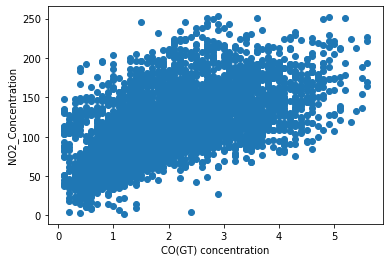

In [24]:
plt.scatter(airQualityDataSet["CO(GT)"],airQualityDataSet["NO2_Concentration"])
plt.xlabel("CO(GT) concentration")
plt.ylabel("NO2_Concentration")
plt.show()

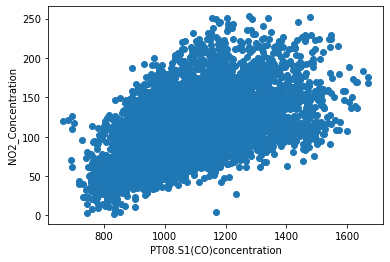

In [25]:
plt.scatter(airQualityDataSet["PT08.S1(CO)"],airQualityDataSet["NO2_Concentration"])
plt.xlabel("PT08.S1(CO)concentration")
plt.ylabel("NO2_Concentration")
plt.show()

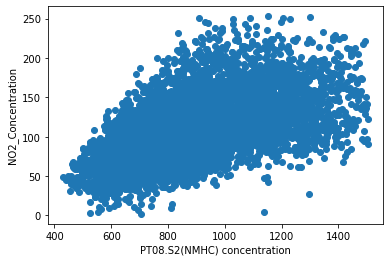

In [26]:
plt.scatter(airQualityDataSet["PT08.S2(NMHC)"],airQualityDataSet["NO2_Concentration"])
plt.xlabel("PT08.S2(NMHC) concentration")
plt.ylabel("NO2_Concentration")
plt.show()

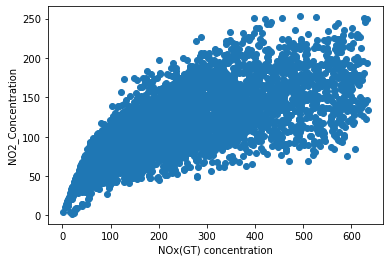

In [27]:
plt.scatter(airQualityDataSet["NOx(GT)"],airQualityDataSet["NO2_Concentration"])
plt.xlabel("NOx(GT) concentration")
plt.ylabel("NO2_Concentration")
plt.show()

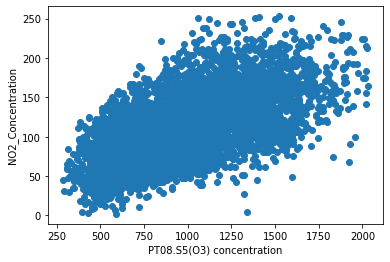

In [28]:
plt.scatter(airQualityDataSet["PT08.S5(O3)"],airQualityDataSet["NO2_Concentration"])
plt.xlabel("PT08.S5(O3) concentration")
plt.ylabel("NO2_Concentration")
plt.show()

In [41]:
#Linear Regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as statmodel
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = airQualityDataSet.drop("NO2_Concentration", axis=1)
Y = airQualityDataSet["NO2_Concentration"]

#Train, test and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create Linear Regression Object
lr = LinearRegression()

#Train the model using the training data
lr.fit(X_train,y_train)

#Make predictions using the testing data
y_pred = lr.predict(X_test)

#Model Evaluation
print("______________________________Linear Regression______________________________")
print("The mean absolute error of the model is ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the model is ", metrics.mean_squared_error(y_test, y_pred))
print("The Root mean squared value of the model is ",  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

#Rsquared value of model
print(" Coefficient of determination or R squared value is ", metrics.r2_score(y_test, y_pred))


______________________________Linear Regression______________________________
The mean absolute error of the model is  21.943857137930813
The mean squared error of the model is  778.3136066393076
The Root mean squared value of the model is  27.89827246693436


 Coefficient of determination or R squared value is  0.5676952527475734


In [57]:
#Support Vector Regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as statmodel
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = airQualityDataSet.drop("NO2_Concentration", axis=1)
Y = airQualityDataSet["NO2_Concentration"]

#Train, test and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


#Create Support Vector Regression Object
SVR_model = make_pipeline(StandardScaler(), SVR(C = 1.0 , epsilon = 0.1))

#Train the model using the training data
SVR_model.fit(X_train,y_train)

#Make predictions using the testing data
y_pred = SVR_model.predict(X_test)

#Model Evaluation
print("______________________________Support Vector Regression______________________________")
print("The mean absolute error of the model is ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the model is ", metrics.mean_squared_error(y_test, y_pred))
print("The Root mean squared value of the model is ",  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

#Rsquared value of model
print(" Coefficient of determination or R squared value is ", metrics.r2_score(y_test, y_pred))



______________________________Support Vector Regression______________________________
The mean absolute error of the model is  19.275107655178907
The mean squared error of the model is  651.1670983739833
The Root mean squared value of the model is  25.517975985057735


 Coefficient of determination or R squared value is  0.6481919840800735


In [61]:
#Random Forest Regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as statmodel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = airQualityDataSet.drop("NO2_Concentration", axis=1)
Y = airQualityDataSet["NO2_Concentration"]

#Train, test and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


#Create RandomForestRegressor Object
rf_model = RandomForestRegressor(n_estimators = 1000 , random_state = 42)

#Train the model using the training data
rf_model.fit(X_train,y_train)

#Make predictions using the testing data
y_pred = rf_model.predict(X_test)

#Model Evaluation
print("______________________________Random Forest Regression______________________________")
print("The mean absolute error of the model is ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the model is ", metrics.mean_squared_error(y_test, y_pred))
print("The Root mean squared value of the model is ",  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

#Rsquared value of model
print(" Coefficient of determination or R squared value is ", metrics.r2_score(y_test, y_pred))

______________________________Random Forest Regression______________________________
The mean absolute error of the model is  16.080785178408043
The mean squared error of the model is  503.6272395283805
The Root mean squared value of the model is  22.44164074947241


 Coefficient of determination or R squared value is  0.7240005501656905


In [65]:
#AdaBoost Regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as statmodel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = airQualityDataSet.drop("NO2_Concentration", axis=1)
Y = airQualityDataSet["NO2_Concentration"]

#Train, test and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Create AdaBoostRegressor Object
adaBst_model = AdaBoostRegressor(learning_rate = 0.001, random_state = 0 , n_estimators = 500)

#Train the model using the training data
adaBst_model.fit(X_train,y_train)

#Make predictions using the testing data
y_pred = adaBst_model.predict(X_test)

#Model Evaluation
print("______________________________AdaBoost Regression __________________________________")
print("The mean absolute error of the model is ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the model is ", metrics.mean_squared_error(y_test, y_pred))
print("The Root mean squared value of the model is ",  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

#Rsquared value of model
print(" Coefficient of determination or R squared value is ", metrics.r2_score(y_test, y_pred))

______________________________AdaBoost Regression __________________________________
The mean absolute error of the model is  19.624615203155823
The mean squared error of the model is  671.31994044844
The Root mean squared value of the model is  25.90984254001633


 Coefficient of determination or R squared value is  0.6368822580497047


In [77]:
#MLP Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

X = airQualityDataSet.drop("NO2_Concentration", axis=1)
Y = airQualityDataSet["NO2_Concentration"]


#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Build and fit the Neural Network MLP Regression Model
mlp = MLPRegressor(hidden_layer_sizes=(15), activation='relu', max_iter = 1000, solver='lbfgs')
mlp_model = mlp.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction 
y_pred = mlp_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[2.0,1360.0,1046.0,166.0,1268.0]]
new_y = mlp_model.predict(new_input)
print("The predict y value is that is the Median Value x $1000 ", new_y)
print("\n")

#Model Evaluation
print("______________________Multilayer perceptron Regression (MLP)_____________________")
print("The mean absolute error of the model is ", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the model is ", metrics.mean_squared_error(y_test, y_pred))
print("The Root mean squared value of the model is ",  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

#Rsquared value of model
print(" Coefficient of determination or R squared value is ", metrics.r2_score(y_test, y_pred))






The predict y value is that is the Median Value x $1000  [6396.92440019]


______________________Multilayer perceptron Regression (MLP)_____________________
The mean absolute error of the model is  16.670318920438472
The mean squared error of the model is  519.9296626826149
The Root mean squared value of the model is  22.80196620211983


 Coefficient of determination or R squared value is  0.740167735373769
